In [3]:
pip install scikit-learn


  Using cached scikit_learn-1.2.2-cp39-cp39-win_amd64.whl (8.4 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install imblearn

                                              0.0/226.0 kB ? eta -:--:--
     -----                                 30.7/226.0 kB 660.6 kB/s eta 0:00:01
     ----------------                     102.4/226.0 kB 991.0 kB/s eta 0:00:01
     -------------------------              153.6/226.0 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 226.0/226.0 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# data pre-processing 
from sklearn.preprocessing import StandardScaler, LabelEncoder

# models
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, BalancedBaggingClassifier 

# model selection and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [8]:
# import data
df = pd.read_csv('Customertravel.csv')
df.head() 

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [9]:
# rename churn column for clarity
df.rename(columns={'Target': 'Churn'}, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Churn                       954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [11]:
df.groupby('Churn').describe()

Age                                                    ServicesOpted  \
       count       mean       std   min   25%   50%   75%   max         count   
Churn                                                                           
0      730.0  32.352055  3.209323  27.0  30.0  31.0  35.0  38.0         730.0   
1      224.0  31.316964  3.620133  27.0  28.0  30.0  35.0  38.0         224.0   

                                                    
           mean       std  min  25%  50%  75%  max  
Churn                                               
0      2.402740  1.554495  1.0  1.0  2.0  3.0  6.0  
1      2.549107  1.763430  1.0  1.0  2.0  4.0  6.0

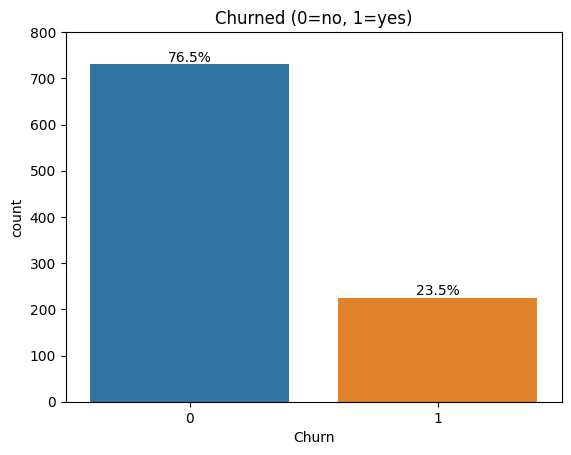

In [12]:
ax = sns.countplot(data=df, x='Churn')
percentage = df['Churn'].value_counts(normalize=True).values * 100
lbls = [f'{p:.1f}%' for p in percentage]

ax.bar_label(container=ax.containers[0], labels=lbls)   
plt.ylim(top=800)
plt.title('Churned (0=no, 1=yes)');  

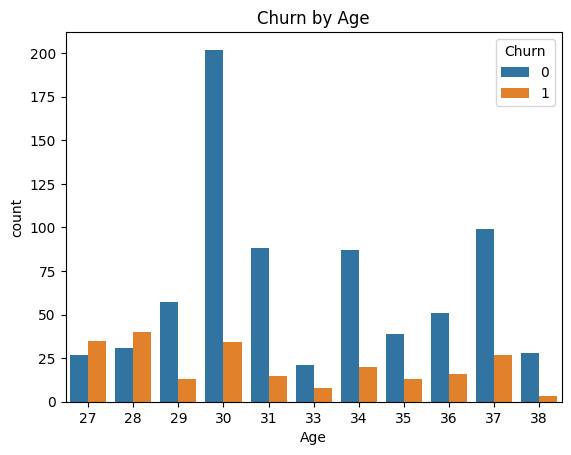

In [13]:
sns.countplot(data=df, x='Age', hue='Churn').set_title('Churn by Age');

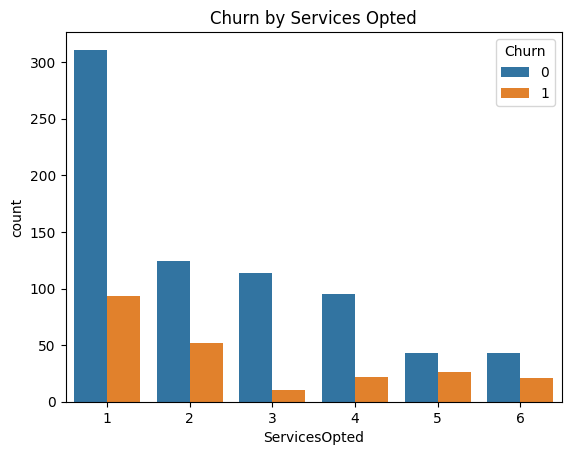

In [14]:
sns.countplot(data=df, x='ServicesOpted', hue='Churn').set_title('Churn by Services Opted');

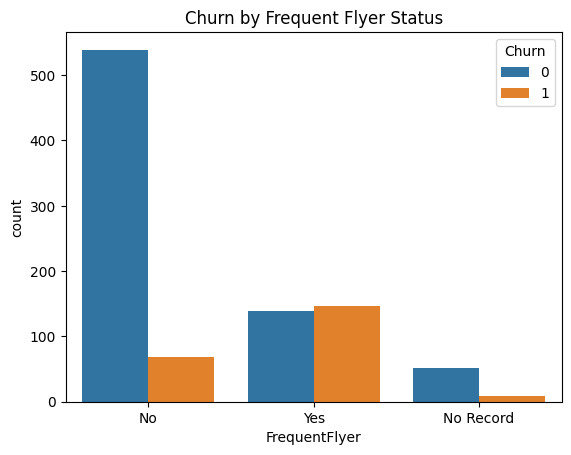

In [15]:
sns.countplot(data=df, x='FrequentFlyer', hue='Churn').set_title('Churn by Frequent Flyer Status');

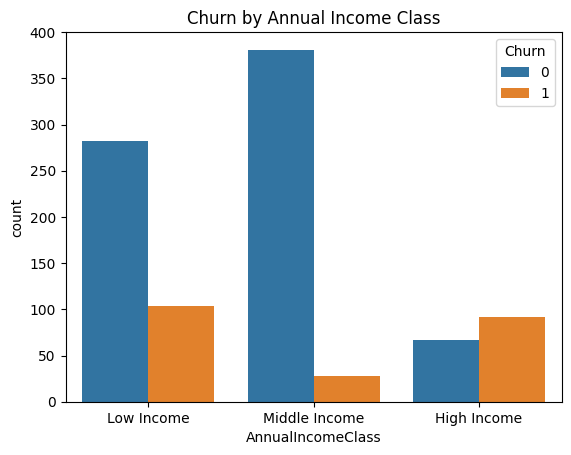

In [16]:
sns.countplot(data=df, x='AnnualIncomeClass', order=['Low Income','Middle Income','High Income'], hue='Churn').set_title('Churn by Annual Income Class');

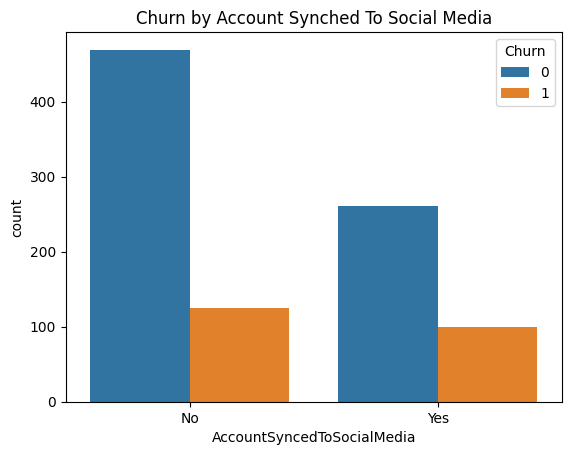

In [17]:
sns.countplot(data=df, x='AccountSyncedToSocialMedia', hue='Churn').set_title('Churn by Account Synched To Social Media');

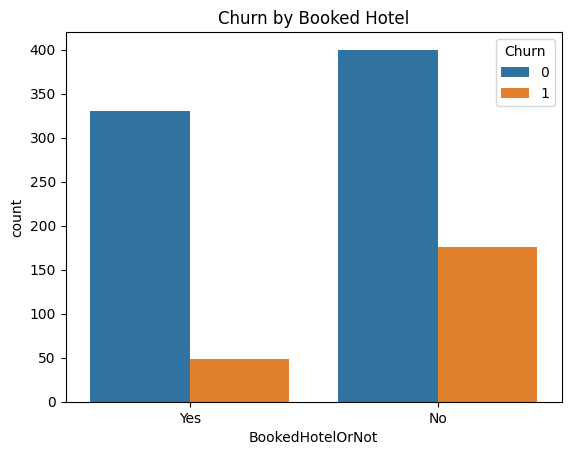

In [18]:
sns.countplot(data=df, x='BookedHotelOrNot', hue='Churn').set_title('Churn by Booked Hotel'); 

In [19]:
df.isnull().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Churn                         0
dtype: int64

In [20]:
# create copy for encoding
df_coded = df.copy()

In [21]:
# Label Encoding ordinal features for services 
ordinals = ['ServicesOpted']
df_coded[ordinals] = df_coded[ordinals].apply(LabelEncoder().fit_transform)

In [22]:
# manually adapt scaling for Annual Income Class as we need to implement the ordinal scale in order to get correct scaling
df_coded = df_coded.replace({'AnnualIncomeClass': {'Low Income': 0, 'Middle Income': 1, 'High Income': 2}})

In [23]:
# One-Hot Encoding non-ordinal features
dummies = ['BookedHotelOrNot', 'AccountSyncedToSocialMedia', 'FrequentFlyer']
df_coded = pd.get_dummies(df_coded, columns = dummies, drop_first=True)

In [24]:
#rename some cols for clarity
df_coded.rename(columns={'BookedHotelOrNot_Yes':'BookedHotel', 'AccountSyncedToSocialMedia_Yes':'AccountSyncedToSocialMedia'}, inplace=True)

In [25]:
df_coded.head(6)

,Age,AnnualIncomeClass,ServicesOpted,Churn,BookedHotel,AccountSyncedToSocialMedia,FrequentFlyer_No Record,FrequentFlyer_Yes
0,34,1,5,0,1,0,0,0
1,34,0,4,1,0,1,0,1
2,37,1,2,0,0,1,0,0
3,30,1,1,0,0,0,0,0
4,30,0,0,0,0,0,0,0
5,27,2,0,1,1,0,0,1


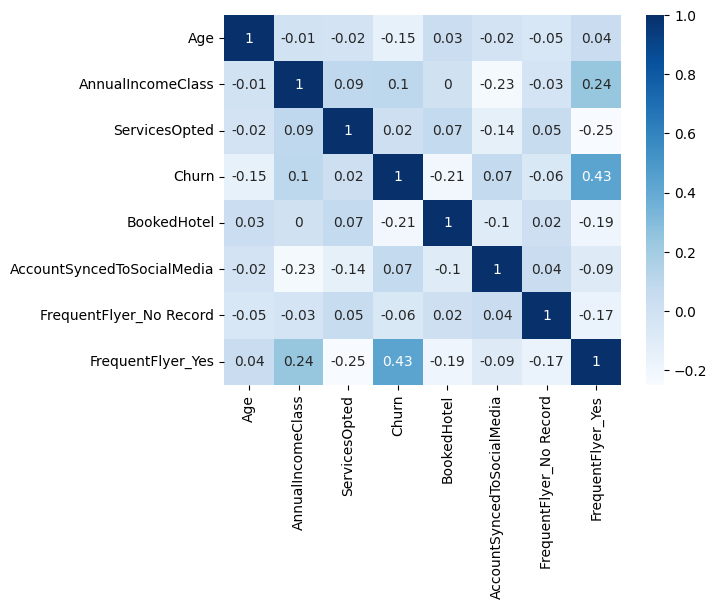

In [26]:
sns.heatmap(np.round(df_coded.corr(method ='spearman'), 2), annot=True,  cmap='Blues');

In [27]:
X = df_coded.drop(columns='Churn', axis=1)
y = df_coded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
# Generic function to fit data and display results/predictions
def fit_evaluate(clf, X_train, X_test, y_train, y_test):
    # fit model to training data
    clf.fit(X_train, y_train)
    # make predictions for test data
    y_pred = clf.predict(X_test)
    # print evaluation
    print(classification_report(y_test, y_pred))
    print('\nConfusion Matrix: \n')
    s = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cmap='YlGnBu');
    s.set(xlabel='Predicted class', ylabel='True class')

* Logistic regression * 

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       240
           1       0.65      0.37      0.47        75

    accuracy                           0.80       315
   macro avg       0.74      0.66      0.68       315
weighted avg       0.79      0.80      0.78       315


Confusion Matrix: 



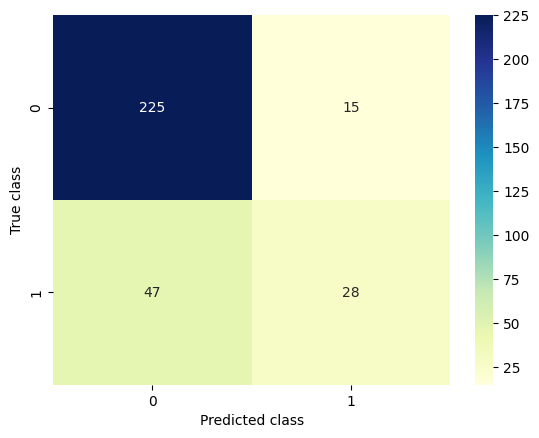

In [29]:
modelLR = LogisticRegression()
print('* Logistic regression * \n')
fit_evaluate(modelLR, X_train, X_test, y_train, y_test)

* Logistic regression * 

              precision    recall  f1-score   support

           0       0.91      0.76      0.83       240
           1       0.50      0.76      0.60        75

    accuracy                           0.76       315
   macro avg       0.70      0.76      0.71       315
weighted avg       0.81      0.76      0.77       315


Confusion Matrix: 



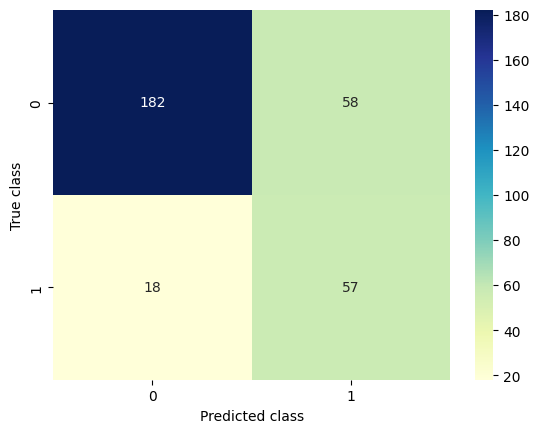

In [30]:
modelLR = LogisticRegression(class_weight='balanced')
print('* Logistic regression * \n')
fit_evaluate(modelLR, X_train, X_test, y_train, y_test)

* Random Forest Classifier * 

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       240
           1       0.81      0.68      0.74        75

    accuracy                           0.89       315
   macro avg       0.86      0.81      0.83       315
weighted avg       0.88      0.89      0.88       315


Confusion Matrix: 



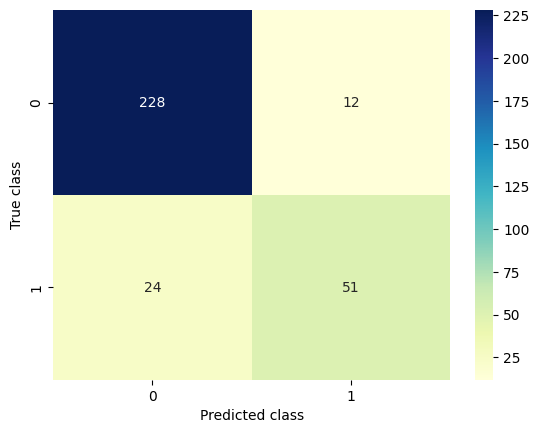

In [31]:
modelRF = RandomForestClassifier()
print('* Random Forest Classifier * \n')
fit_evaluate(modelRF, X_train, X_test, y_train, y_test)

* Random Forest Classifier * 

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       240
           1       0.78      0.68      0.73        75

    accuracy                           0.88       315
   macro avg       0.84      0.81      0.83       315
weighted avg       0.88      0.88      0.88       315


Confusion Matrix: 



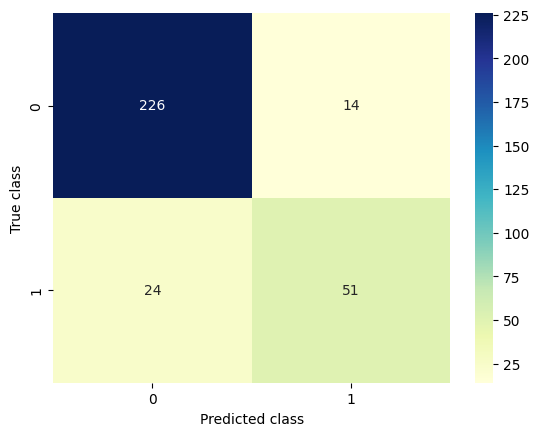

In [34]:
modelRF_bal = RandomForestClassifier()
print('* Random Forest Classifier * \n')
fit_evaluate(modelRF_bal, X_train, X_test, y_train, y_test)

* Balanced Bagging Classifier * 

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       240
           1       0.73      0.88      0.80        75

    accuracy                           0.89       315
   macro avg       0.84      0.89      0.86       315
weighted avg       0.90      0.89      0.90       315


Confusion Matrix: 



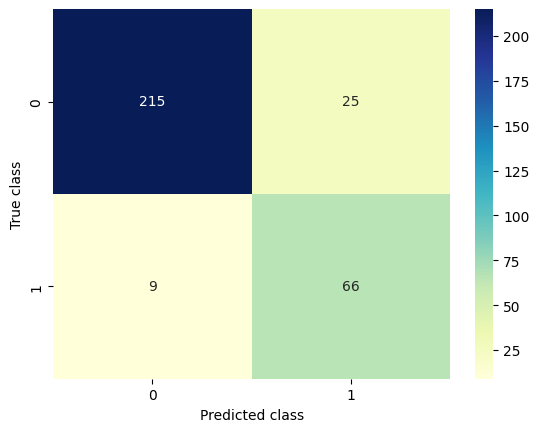

In [35]:
modelBBC = BalancedBaggingClassifier()
print('* Balanced Bagging Classifier * \n')
fit_evaluate(modelBBC, X_train, X_test, y_train, y_test)

* K Nearest Neighbors Classifier * 

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       240
           1       0.85      0.63      0.72        75

    accuracy                           0.89       315
   macro avg       0.87      0.80      0.83       315
weighted avg       0.88      0.89      0.88       315


Confusion Matrix: 



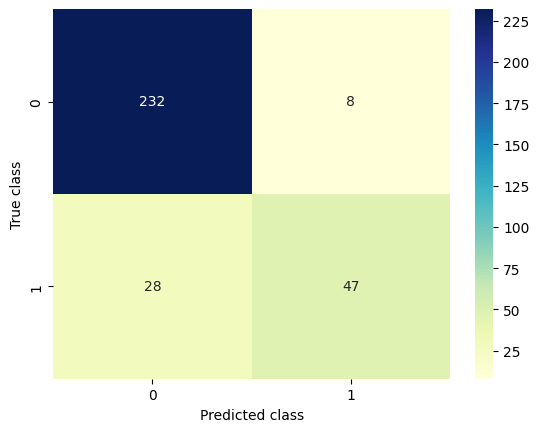

In [36]:
modelKNN = KNeighborsClassifier() 
print('* K Nearest Neighbors Classifier * \n')
fit_evaluate(modelKNN, X_train, X_test, y_train, y_test)

Minimum error: 0.114 at K = 5 



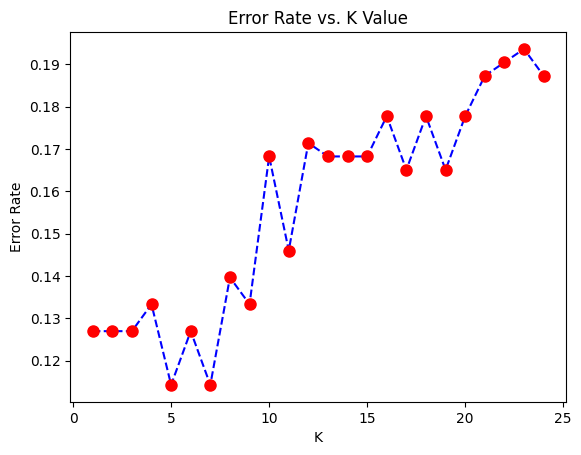

In [37]:
# finding the best k 
error_rate = []
for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.plot(range(1,25), error_rate, color='b', linestyle='--', marker='o', markerfacecolor='r', markeredgecolor='r', markersize=8)
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. K Value')

# plotting the k value that minimizes the error 
print('Minimum error:', np.round(min(error_rate), 3),'at K =', (error_rate.index(min(error_rate)) + 1), '\n');